How does a Data Science project works:
    These are the following steps:
    - Understanding the Problem/Challenge you need to resolve
    - Understanding the Company/Area
    - Data Extraction
    - Data Adjustment (Data Cleaning)
    - Exploratory Analysis
    - Algorithm + Modeling
    - Result Interpretation
    - Deploy/Production

Project Gas Brazil - Prevision Tool for Gas Prices in Brazil

Context:

Import libraries

In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_path = pathlib.Path('dataset')

gas_brazil = pd.DataFrame()

for file in base_path.iterdir():
    df = pd.read_csv(base_path / file.name, sep = '\t')
    gas_brazil = gas_brazil.append(df)

display(gas_brazil)

C:\Users\ianpe\AppData\Local\Temp\ipykernel_11172\759247268.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gas_brazil = gas_brazil.append(df)


,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


Treating missing values

In [3]:
for column in gas_brazil:
    if gas_brazil[column].isnull().sum() > 45000:
        gaz_brazil = gaz_brazil.drop(column, axis=1)
        
print(gas_brazil.isnull().sum())

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64


In [4]:
zero = '0'
verification_num = '-99999.0'
columns_verify = [
    'MARGEM MÉDIA REVENDA', 
    'PREÇO MÉDIO DISTRIBUIÇÃO',
    'DESVIO PADRÃO DISTRIBUIÇÃO',
    'PREÇO MÍNIMO DISTRIBUIÇÃO',
    'PREÇO MÁXIMO DISTRIBUIÇÃO',
    'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
]

aux = 0
for column in columns_verify:
    for num in gas_brazil[column]:
        if '-' in num:
            aux += 1
    if aux > 45000:
        gas_brazil = gas_brazil.drop(column, axis=1)

# Adapting based on the filter above
columns_verify = columns_verify.pop()
        
print(gas_brazil)

       DATA INICIAL  DATA FINAL        REGIÃO              ESTADO  \
0        2004-05-09  2004-05-15  CENTRO OESTE    DISTRITO FEDERAL   
1        2004-05-09  2004-05-15  CENTRO OESTE               GOIAS   
2        2004-05-09  2004-05-15  CENTRO OESTE         MATO GROSSO   
3        2004-05-09  2004-05-15  CENTRO OESTE  MATO GROSSO DO SUL   
4        2004-05-09  2004-05-15      NORDESTE             ALAGOAS   
...             ...         ...           ...                 ...   
120818   2021-04-25  2021-05-01         NORTE             RORAIMA   
120819   2021-04-25  2021-05-01           SUL      SANTA CATARINA   
120820   2021-04-25  2021-05-01       SUDESTE           SAO PAULO   
120821   2021-04-25  2021-05-01      NORDESTE             SERGIPE   
120822   2021-04-25  2021-05-01         NORTE           TOCANTINS   

                 PRODUTO  NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  \
0       ETANOL HIDRATADO                           127              R$/l   
1       ETANOL HIDR

Verifying Data Types for each Column

In [5]:
print(gas_brazil.dtypes)
print('-'*60)
print(gas_brazil.iloc[-1])

DATA INICIAL                     object
DATA FINAL                       object
REGIÃO                           object
ESTADO                           object
PRODUTO                          object
NÚMERO DE POSTOS PESQUISADOS      int64
UNIDADE DE MEDIDA                object
PREÇO MÉDIO REVENDA             float64
DESVIO PADRÃO REVENDA           float64
PREÇO MÍNIMO REVENDA            float64
PREÇO MÁXIMO REVENDA            float64
MARGEM MÉDIA REVENDA             object
COEF DE VARIAÇÃO REVENDA        float64
PREÇO MÉDIO DISTRIBUIÇÃO         object
DESVIO PADRÃO DISTRIBUIÇÃO       object
PREÇO MÍNIMO DISTRIBUIÇÃO        object
PREÇO MÁXIMO DISTRIBUIÇÃO        object
dtype: object
------------------------------------------------------------
DATA INICIAL                         2021-04-25
DATA FINAL                           2021-05-01
REGIÃO                                    NORTE
ESTADO                                TOCANTINS
PRODUTO                         OLEO DIESEL S10
NÚMER

Data Treatment

In [6]:
gas_brazil['MARGEM MÉDIA REVENDA'] = gas_brazil['MARGEM MÉDIA REVENDA'].str.replace('-', '9')
gas_brazil['MARGEM MÉDIA REVENDA'] = gas_brazil['MARGEM MÉDIA REVENDA'].astype(np.float32, copy=False)

gas_brazil['PREÇO MÉDIO DISTRIBUIÇÃO'] = gas_brazil['PREÇO MÉDIO DISTRIBUIÇÃO'].str.replace('-', '9')
gas_brazil['PREÇO MÉDIO DISTRIBUIÇÃO'] = gas_brazil['PREÇO MÉDIO DISTRIBUIÇÃO'].astype(np.float32, copy=False)

gas_brazil['DESVIO PADRÃO DISTRIBUIÇÃO'] = gas_brazil['DESVIO PADRÃO DISTRIBUIÇÃO'].str.replace('-', '9')
gas_brazil['DESVIO PADRÃO DISTRIBUIÇÃO'] = gas_brazil['DESVIO PADRÃO DISTRIBUIÇÃO'].astype(np.float32, copy=False)

gas_brazil['PREÇO MÍNIMO DISTRIBUIÇÃO'] = gas_brazil['PREÇO MÍNIMO DISTRIBUIÇÃO'].str.replace('-', '9')
gas_brazil['PREÇO MÍNIMO DISTRIBUIÇÃO'] = gas_brazil['PREÇO MÍNIMO DISTRIBUIÇÃO'].astype(np.float32, copy=False)

gas_brazil['PREÇO MÁXIMO DISTRIBUIÇÃO'] = gas_brazil['PREÇO MÁXIMO DISTRIBUIÇÃO'].str.replace('-', '9')
gas_brazil['PREÇO MÁXIMO DISTRIBUIÇÃO'] = gas_brazil['PREÇO MÁXIMO DISTRIBUIÇÃO'].astype(np.float32, copy=False)

In [7]:
for column in gas_brazil:
    if gas_brazil[column].dtypes == 'float64' or gas_brazil[column].dtypes == 'float':
        gas_brazil[column] = gas_brazil[column].astype(np.float32, copy=False)
        
for column in gas_brazil:
    if gas_brazil[column].dtypes == 'int64' or gas_brazil[column].dtypes == 'int':
        gas_brazil[column] = gas_brazil[column].astype(np.int32, copy=False)

print(gas_brazil.dtypes)

DATA INICIAL                     object
DATA FINAL                       object
REGIÃO                           object
ESTADO                           object
PRODUTO                          object
NÚMERO DE POSTOS PESQUISADOS      int32
UNIDADE DE MEDIDA                object
PREÇO MÉDIO REVENDA             float32
DESVIO PADRÃO REVENDA           float32
PREÇO MÍNIMO REVENDA            float32
PREÇO MÁXIMO REVENDA            float32
MARGEM MÉDIA REVENDA            float32
COEF DE VARIAÇÃO REVENDA        float32
PREÇO MÉDIO DISTRIBUIÇÃO        float32
DESVIO PADRÃO DISTRIBUIÇÃO      float32
PREÇO MÍNIMO DISTRIBUIÇÃO       float32
PREÇO MÁXIMO DISTRIBUIÇÃO       float32
dtype: object


Exploratory Analysis and Outlier Treatment

<AxesSubplot:>

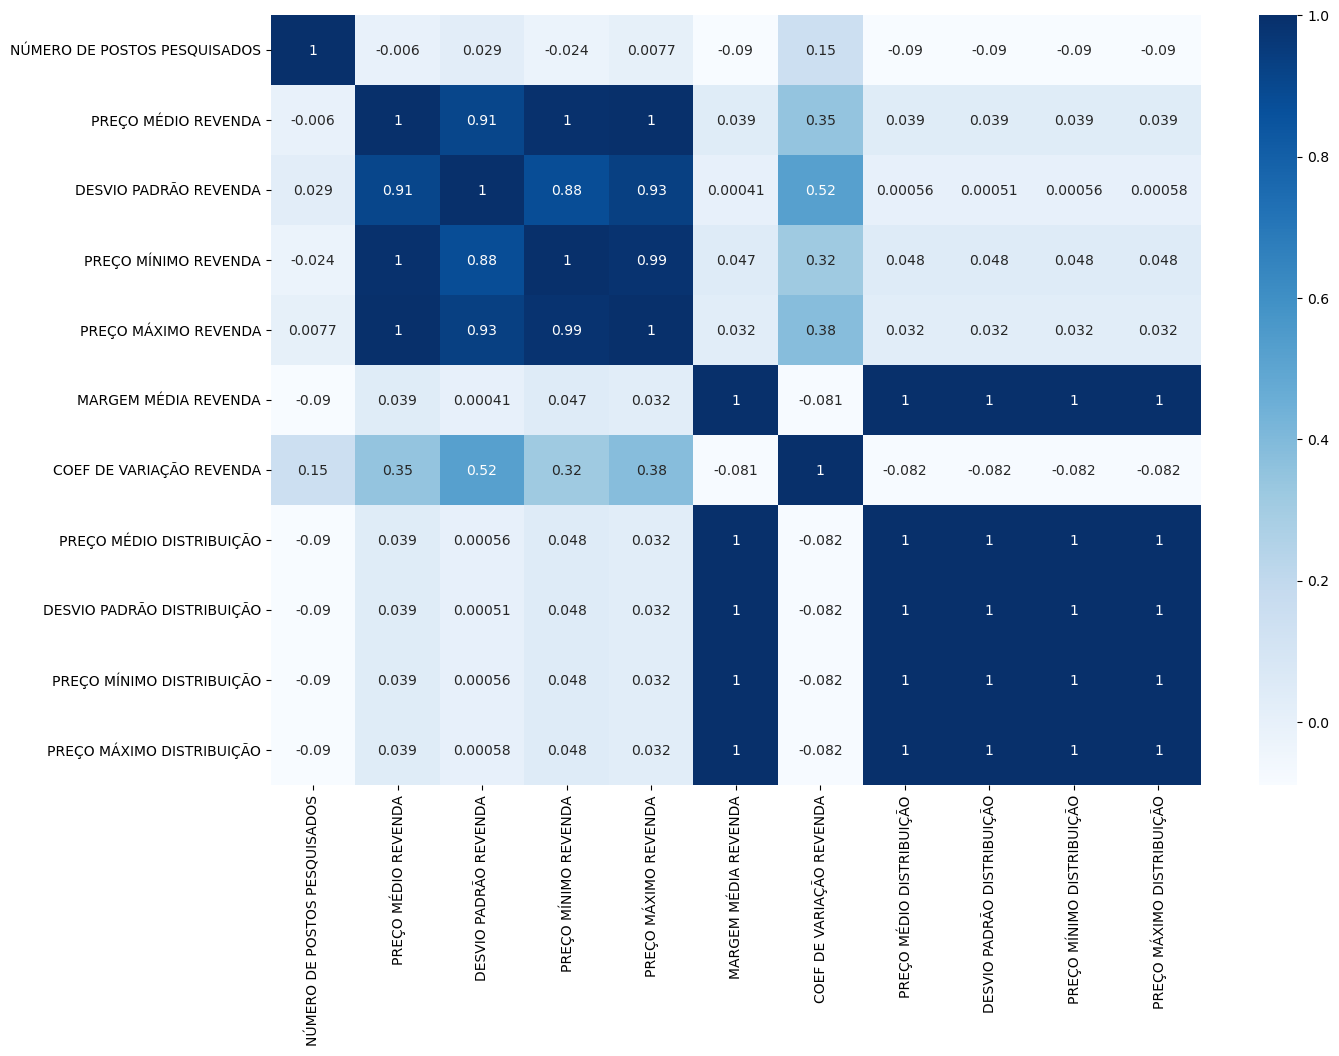

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(gas_brazil.corr(), annot=True, cmap='Blues')

#print(gas_brazil.corr())

Methods for Exploratory Analysis of Outliers 

In [9]:
def limit(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    amplitude = q3 - q1
    
    inferior_limit = q1 - 1.5 * amplitude
    superior_limit = q3 + 1.5 * amplitude
    
    return inferior_limit, superior_limit

In [21]:
def box_plot(column):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    
    sns.boxplot(x=column, ax=ax1)
    ax2.set_xlim(limit(column))
    sns.boxplot(x=column, ax=ax2)
    
def histogram(column):
    plt.figure(figsize=(15, 5))
    sns.distplot(column, hist=True)

C:\Users\ianpe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


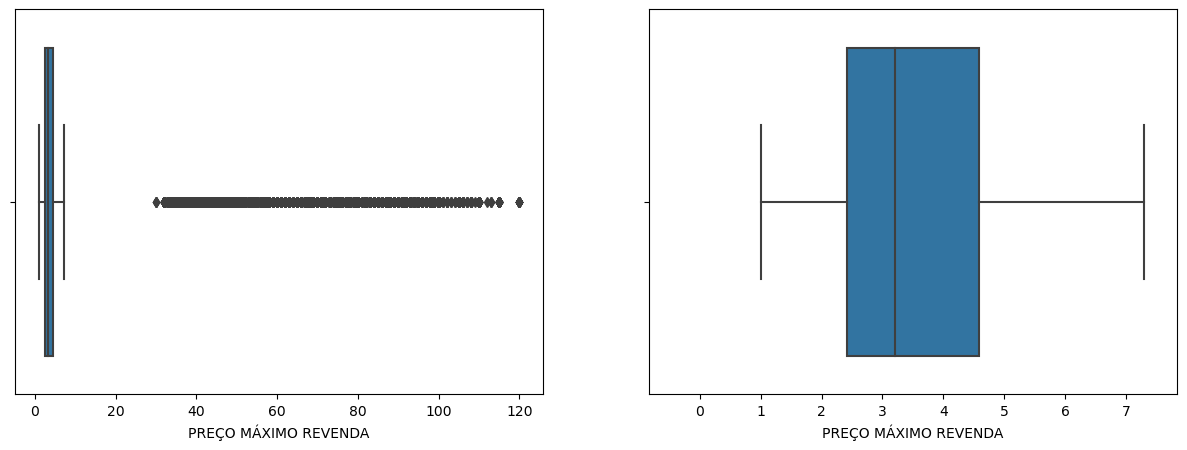

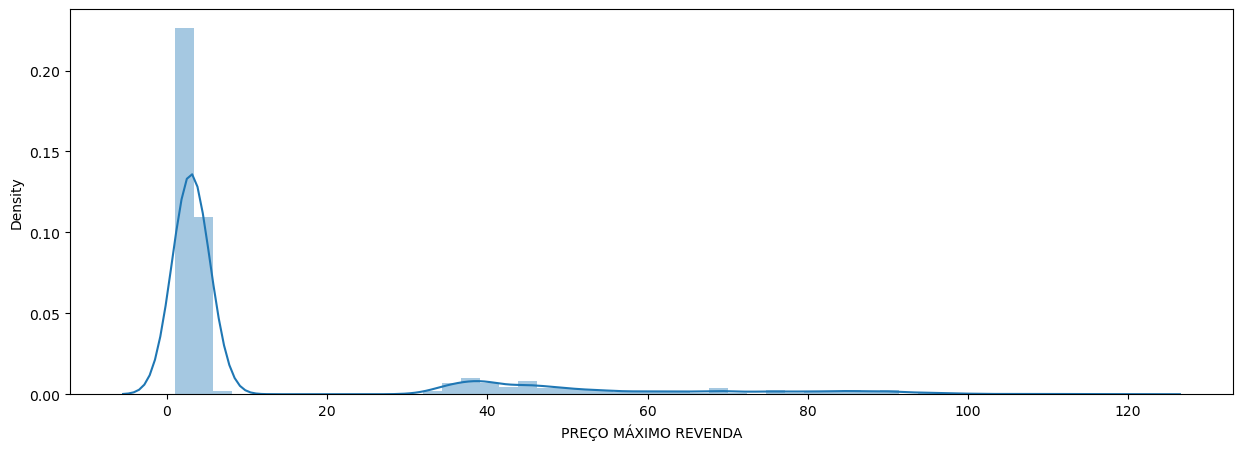

In [22]:
box_plot(gas_brazil['PREÇO MÁXIMO REVENDA'])
histogram(gas_brazil['PREÇO MÁXIMO REVENDA'])